In [1]:
import numpy as np
import biom
import pandas as pd
import random
import matplotlib.pyplot as plt
from biom.util import biom_open
from sklearn.preprocessing import scale
%matplotlib inline

### load and preprocess data

In [2]:
#define directory to read/write files
read_path = '/Users/bec5786/Desktop/temp/tempted_in'
save_path = '/Users/bec5786/Desktop/temp/tempted_out'

In [3]:
# load data
cohort = 'Elicit'
mf = pd.read_csv('{}/{}_CTF_sample_metadata.tsv'.format(read_path, cohort), sep='\t', index_col=0)
table_biom = biom.load_table('{}/{}_raw2.hd5.biom'.format(read_path, cohort))
table_df = table_biom.to_dataframe()
table_array = table_df.values

In [4]:
display(mf.head())
table_biom

,SubjectID,SUBJID,ARM,ARMCD,SEXN,SEX,BRTHYR,BRTHWEEK,MAGE,PARITY,...,WHZ_M3_binary_bins,HAZ_M6_binary_bins,WHZ_M6_binary_bins,HAZ_M9_binary_bins,WHZ_M9_binary_bins,HAZ_M12_binary_bins,WHZ_M12_binary_bins,HAZ_M18_binary_bins,WHZ_M18_binary_bins,Timepoint
SampleID,,,,,,,,,,,,,,,,,,,,,
TZ1100009,TZ1C1008,1008,"Nicotinamide, Azithromycin &Nitazoxanide",4,1,Male,2017,37,33,5,...,above -1,below -1,below -1,below -1,above -1,below -1,above -1,below -1,above -1,1
TZ1100583,TZ1C1008,1008,"Nicotinamide, Azithromycin &Nitazoxanide",4,1,Male,2017,37,33,5,...,above -1,below -1,below -1,below -1,above -1,below -1,above -1,below -1,above -1,2
TZ1100021,TZ1C1014,1014,"Placebo, Placebo",1,1,Male,2017,38,33,8,...,below -1,above -1,below -1,above -1,below -1,above -1,above -1,above -1,above -1,1
TZ1100634,TZ1C1014,1014,"Placebo, Placebo",1,1,Male,2017,38,33,8,...,below -1,above -1,below -1,above -1,below -1,above -1,above -1,above -1,above -1,2
TZ1100012,TZ1C1015,1015,"Nicotinamide, Placebo",3,1,Male,2017,38,20,1,...,below -1,above -1,below -1,above -1,below -1,below -1,above -1,below -1,above -1,1


60608 x 400 <class 'biom.table.Table'> with 23095412 nonzero entries (95% dense)

In [5]:
mf[['SubjectID','Timepoint']].head()

,SubjectID,Timepoint
SampleID,,
TZ1100009,TZ1C1008,1
TZ1100583,TZ1C1008,2
TZ1100021,TZ1C1014,1
TZ1100634,TZ1C1014,2
TZ1100012,TZ1C1015,1


In [6]:
#mf.SubjectID.value_counts() #TZ1C1381 only has one tp

#make sure there are at least two time points per subject
subject_id_column = 'SubjectID'
ids_to_keep = mf[subject_id_column].value_counts()[mf[subject_id_column].value_counts() > 1].index
mf = mf[mf[subject_id_column].isin(ids_to_keep)]

In [7]:
table_df.head()

,TZ1100009,TZ1100583,TZ1100021,TZ1100634,TZ1100012,TZ1100633,TZ1100027,TZ1100705,TZ1100026,TZ1100706,...,TZ1105273,TZ1110945,TZ1105117,TZ1111340,TZ1105451,TZ1111109,TZ1105125,TZ1111077,TZ1105149,TZ1111151
rLC_pos_mtb_2172957,225.0,0.0,120.0,410.0,308.0,127.0,360.0,234.0,136.0,261.0,...,283.0,112.0,286.0,275.0,726.0,292.0,106.0,262.0,57.0,58.0
rLC_pos_mtb_8553707,211.0,305.0,367.0,365.0,243.0,317.0,355.0,240.0,227.0,250.0,...,193.0,180.0,192.0,327.0,495.0,360.0,269.0,302.0,250.0,267.0
rLC_pos_mtb_154232,26.0,119.0,17.0,262.0,109.0,63.0,35.0,0.0,54.0,15.0,...,0.0,0.0,124.0,85.0,0.0,131.0,0.0,0.0,0.0,21.0
rLC_pos_mtb_2328983,229.0,137.0,204.0,94.0,204.0,202.0,147.0,225.0,190.0,164.0,...,149.0,208.0,154.0,212.0,206.0,170.0,281.0,179.0,338.0,250.0
rLC_pos_mtb_2707705,16.0,89.0,323.0,205.0,70.0,117.0,0.0,0.0,289.0,166.0,...,116.0,70.0,140.0,0.0,176.0,263.0,28.0,116.0,0.0,39.0


In [8]:
print(table_df.isna().sum().sum())
print(table_df.isnull().sum().sum())
print(np.isnan(table_array).sum())

0
0
0


In [9]:
#step 1: imputation
random.seed(100)
#draw from unif distribution with low=min(table)/10 and high=min(table)
zero_len = len(table_array[table_array==0])
print("There are {} zeros in the array".format(zero_len))
min_value = table_array[table_array!=0].min()
print("The min value (excluding 0) in the array is {}".format(min_value))
rand_array = np.random.uniform(low=min_value/10, high=min_value, size=zero_len)
table_array[table_array==0] = rand_array
#sanity check
print(rand_array.min())
print(table_array.min())

There are 1147788 zeros in the array
The min value (excluding 0) in the array is 1.0
0.10000087997853935
0.10000087997853935


In [10]:
#step 2: log10 transform the data
table_array = np.log10(table_array)
print(table_array)

[[ 2.35218252 -0.105632    2.07918125 ...  2.41830129  1.75587486
   1.76342799]
 [ 2.32428246  2.48429984  2.56466606 ...  2.48000694  2.39794001
   2.42651126]
 [ 1.41497335  2.07554696  1.23044892 ... -0.02288001 -0.14172901
   1.32221929]
 ...
 [ 5.29469103  4.76348041  5.59779497 ...  5.25111968  5.80039055
   5.6057951 ]
 [ 6.35179785  5.91253079  6.48691664 ...  6.40112971  6.62495066
   6.53909618]
 [ 6.05424793  6.1355413   6.06657264 ...  5.94143341  5.66074409
   5.26296103]]


In [11]:
#step 3: scale the data row-wise (feature-level)
table_array_scaled = scale(table_array, axis=1)
print(table_array_scaled)

[[ 0.41179637 -2.53180292  0.08483665 ...  0.49098346 -0.30237095
  -0.29332494]
 [-0.7506379   0.07742948  0.49331335 ...  0.05521435 -0.36947046
  -0.22161826]
 [ 0.13968135  0.76355088 -0.03459017 ... -1.21827921 -1.33052449
   0.05208108]
 ...
 [ 0.02935644 -1.29311522  0.78394672 ... -0.07911631  1.2883171
   0.80386339]
 [ 0.01060459 -1.08375252  0.34722945 ...  0.1335063   0.69111708
   0.47722565]
 [ 0.18007595  0.42075484  0.21656476 ... -0.1539251  -0.98493988
  -2.16262485]]


In [12]:
#step 4: turn back into biom table
table_transformed = biom.Table(table_array_scaled, 
                               table_df.index, 
                               table_df.columns)
#save
with biom_open('{}/{}_transformed.biom'.format(read_path, cohort), 'w') as f:  
   table_transformed.to_hdf5(f, 'sapient-norm')

In [13]:
#save transformed table as csv
table_transformed.to_dataframe().to_csv('{}/{}_transformed.csv'.format(read_path, cohort))

/var/folders/wc/r9njmvn106j5gvr496l3xw65jl16p6/T/ipykernel_15429/1741911070.py:2: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  table_transformed.to_dataframe().to_csv('{}/{}_transformed.csv'.format(read_path, cohort))


### TEMPTED

In [14]:
from gemelli.tempted import (tempted_factorize, tempted)
#from gemelli.preprocessing import clr_transformation

In [15]:
print(table_transformed.to_dataframe().values[0:5,0:5])
print(table_transformed.to_dataframe().values.shape)

[[ 0.41179637 -2.53180292  0.08483665  0.72390532  0.57511762]
 [-0.7506379   0.07742948  0.49331335  0.48103238 -0.43329579]
 [ 0.13968135  0.76355088 -0.03459017  1.08726043  0.72754854]
 [ 0.71558626 -0.58530364  0.42286003 -1.53914444  0.42286003]
 [-0.41373449  0.3592481   0.93987703  0.73508631  0.25107808]]
(60608, 400)


In [16]:
min_sample_count=table_transformed.sum(axis='sample').min()
min_feature_count=table_transformed.sum(axis='observation').min()
print("Mins:", min_sample_count, min_feature_count)

Mins: -581422.5447798315 -1.3444585722499625e-11


In [17]:
tempted_res = tempted(table=table_transformed.copy(), 
                      sample_metadata=mf,
                      individual_id_column='SubjectID', 
                      state_column='Timepoint',
                      min_sample_count=min_sample_count-1, #add -1 to avoid filtering error
                      min_feature_count=min_feature_count,
                      transformation=lambda x: x)

Prop explained: [0.03588002 0.03378489 0.01754175]
Prop explained argsort: [0 1 2]
Eigenvalues pre-sorting: [5450.69337197 3056.66910576 2163.1725716 ]
Eigenvalues post-sorting: [5450.69337197 3056.66910576 2163.1725716 ]


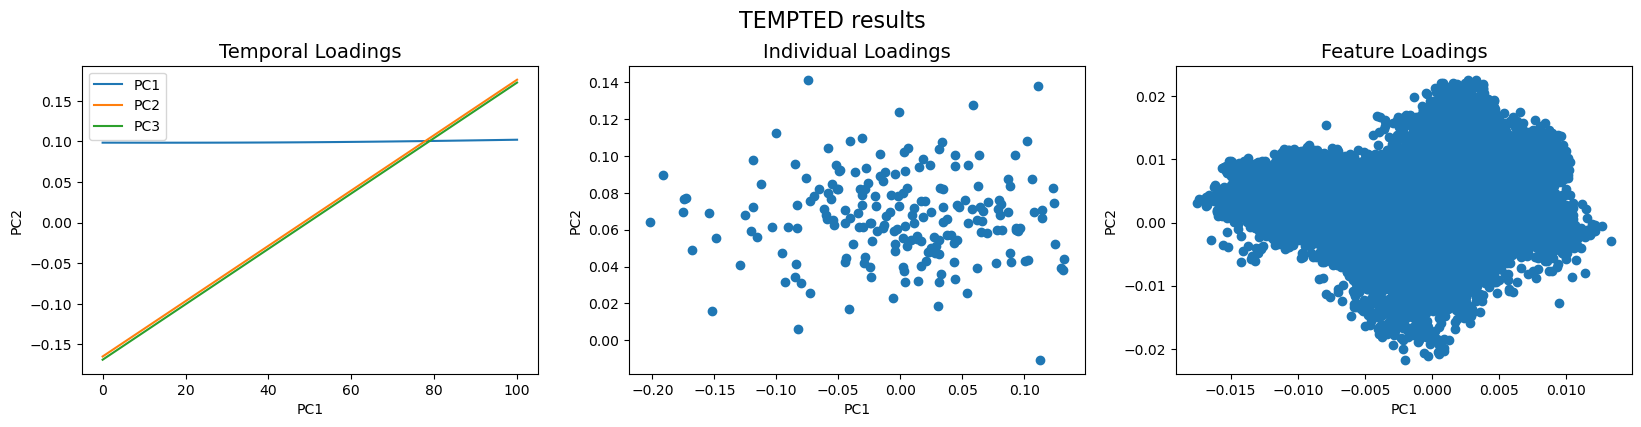

In [18]:
#feature loadings
comp1 = 'PC1'
comp2 = 'PC2'

fig, axn = plt.subplots(1, 3, figsize=(20, 4), sharey=False)
axn[0].plot(tempted_res[1][['PC1', 'PC2', 'PC3']])
axn[0].set_title('Temporal Loadings', fontsize=14)
axn[0].legend(['PC1', 'PC2', 'PC3'])
axn[1].scatter(tempted_res[0].samples[comp1],
               tempted_res[0].samples[comp2])
axn[1].set_title('Individual Loadings', fontsize=14)
axn[2].scatter(tempted_res[0].features[comp1],
               tempted_res[0].features[comp2])
axn[2].set_title('Feature Loadings', fontsize=14)
plt.suptitle('TEMPTED results', fontsize=16, y=1.02)
plt.setp(axn, xlabel=comp1.replace('_', ' '), 
         ylabel=comp2.replace('_', ' '))
plt.show()

In [19]:
# %%bash
# biom convert \
#   -i Misame_transformed.biom \
#   -o Misame_transformed.hd5.biom \
#   --to-hdf5

In [20]:
##save to dir
tempted_res[0].features.to_csv('{}/{}_subject_ordination.csv'.format(save_path, cohort))
tempted_res[1].to_csv('{}/{}_state_loadings.csv'.format(save_path, cohort))
# tempted_res[2].write('{}/{}_distance_matrix.qza'.format(save_path, cohort))
# tempted_res[3].to_csv('{}/{}_svd_center.csv'.format(save_path, cohort))